In [1]:
import pandas as pd
from os import listdir

In [2]:
for file in reversed(sorted(listdir('.'))): #nos uqedamos con el mas grande en caso de actualizar el ds
    if 'ds_balanced' in file:
        print(file)

ds_balanced_802_rs2.csv
ds_balanced_795_rs8008.csv
ds_balanced_795_rs2.csv
ds_balanced_795.csv
ds_balanced_1133_rs2.csv


In [3]:
ds_name = 'ds_balanced_1133_rs2.csv'
#ds_name = 'ds_balanced_795.csv' # con el otro (1111) empeora XD
print('selected: ', ds_name)

selected:  ds_balanced_1133_rs2.csv


In [4]:
df = pd.read_csv(ds_name)
pd.set_option('display.max_colwidth', 200)
print(df.columns)
df[['title', 'content']].head()

Index(['id', 'title', 'content', 'category', 'url', 'text'], dtype='object')


,title,content
0,Bolsonaro acusa que “otros países” quieren debilitar a la industria agrícola brasileña,Bolsonaro acusa que “otros países” quieren debilitar a la industria agrícola brasileña. El presidente Jair Bolsonaro acusó este viernes a los gobiernos críticos con su gestión ambiental de querer ...
1,Perú: Cinco partidos opositores presentan nueva moción para destituir a Presidente Vizcarra,Perú: Cinco partidos opositores presentan nueva moción para destituir a Presidente Vizcarra. Legisladores de cinco partidos opositores presentaron este martes una nueva solicitud de destitución de...
2,Colegio Electoral de EE.UU. ratifica la elección de Joe Biden como próximo presidente del país,Colegio Electoral de EE.UU. ratifica la elección de Joe Biden como próximo presidente del país. El Colegio Electoral de EE.UU. ratificó este lunes la elección de Joe Biden como próximo preside...
3,Elecciones en EE.UU.: Cámara de Representantes y el Senado se reúnen para oficializar triunfo de Joe Biden en una tensa jornada,"Elecciones en EE.UU.: Cámara de Representantes y el Senado se reúnen para oficializar triunfo de Joe Biden en una tensa jornada. Este miércoles, los integrantes de la Cámara de Representantes y el..."
4,Vacunas: Rusia podría suministrarla en diciembre a Latinoamerica y Reino Unido busca infectar a voluntarios,Vacunas: Rusia podría suministrarla en diciembre a Latinoamerica y Reino Unido busca infectar a voluntarios. Diversos avances ha alcanzado el desarrollo de las vacunas para combatir el coronavirus...


In [5]:
MAX_LEN = 1200
DROPOUT = 0.8
MAX_VOCAB_SIZE = 50000
RANDOM_STATE = 8008
BATCH_SIZE = 32
EMBEDDING_DIM = 300
N_FILTERS = 100
FILTER_SIZES = [2, 3, 4]
LR = 0.0005
N_EPOCHS = 10

## Truncar contenido
### Cuanto?

In [6]:
df['content'] = df.content.str.slice(0, MAX_LEN)
print('min len: ', df.content.map(len).min())
print('max len: ', df.content.map(len).max())

min len:  147
max len:  1200


In [7]:
df = df[['id', 'title', 'content', 'category']]
df

,id,title,content,category
0,5746050,Bolsonaro acusa que “otros países” quieren debilitar a la industria agrícola brasileña,Bolsonaro acusa que “otros países” quieren debilitar a la industria agrícola brasileña. El presidente Jair Bolsonaro acusó este viernes a los gobiernos críticos con su gestión ambiental de querer ...,1-Mundo
1,14798851,Perú: Cinco partidos opositores presentan nueva moción para destituir a Presidente Vizcarra,Perú: Cinco partidos opositores presentan nueva moción para destituir a Presidente Vizcarra. Legisladores de cinco partidos opositores presentaron este martes una nueva solicitud de destitución de...,1-Mundo
2,14793198,Colegio Electoral de EE.UU. ratifica la elección de Joe Biden como próximo presidente del país,Colegio Electoral de EE.UU. ratifica la elección de Joe Biden como próximo presidente del país. El Colegio Electoral de EE.UU. ratificó este lunes la elección de Joe Biden como próximo preside...,1-Mundo
3,5693579,Elecciones en EE.UU.: Cámara de Representantes y el Senado se reúnen para oficializar triunfo de Joe Biden en una tensa jornada,"Elecciones en EE.UU.: Cámara de Representantes y el Senado se reúnen para oficializar triunfo de Joe Biden en una tensa jornada. Este miércoles, los integrantes de la Cámara de Representantes y el...",1-Mundo
4,15536930,Vacunas: Rusia podría suministrarla en diciembre a Latinoamerica y Reino Unido busca infectar a voluntarios,Vacunas: Rusia podría suministrarla en diciembre a Latinoamerica y Reino Unido busca infectar a voluntarios. Diversos avances ha alcanzado el desarrollo de las vacunas para combatir el coronavirus...,1-Mundo
...,...,...,...,...
11325,4049494,"11 de septiembre: al menos 17 detenidos y Gobierno dice que se ha respetado el orden ""salvo en lugares muy específicos""","11 de septiembre: al menos 17 detenidos y Gobierno dice que se ha respetado el orden ""salvo en lugares muy específicos"". De acuerdo al balance realizado por el Gobierno y Carabineros, hay 17 deten...",9-Crimen_delitos_y_Justicia
11326,4752517,Muertes por Covid-19: Mañalich decide renunciar a su derecho a guardar silencio y pide declarar ante la justicia “lo antes posible”,Muertes por Covid-19: Mañalich decide renunciar a su derecho a guardar silencio y pide declarar ante la justicia “lo antes posible”. “Renunciando a su derecho a guardar silencio venimos en solicit...,9-Crimen_delitos_y_Justicia
11327,4694244,General (r) Hermes Soto declara en Caso Catrillanca: “No hubo ninguna comunicación especial de que hubo un enfrentamiento”,"General (r) Hermes Soto declara en Caso Catrillanca: “No hubo ninguna comunicación especial de que hubo un enfrentamiento”. Con un impecable terno azul marino, camisa blanca y corbata azul, y port...",9-Crimen_delitos_y_Justicia
11328,179673,Hombre resulta herido tras recibir disparo en su casa efectuado por desconocidos en Cartagena,"Hombre resulta herido tras recibir disparo en su casa efectuado por desconocidos en Cartagena. Un hombre resultó herido de bala, luego que un grupo de personas llegaran hasta su domicilio en Carta...",9-Crimen_delitos_y_Justicia


In [8]:
from sklearn.utils import shuffle
df = shuffle(df, random_state=RANDOM_STATE)

In [9]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.45, random_state=RANDOM_STATE)
for train_index, test_valid_index in split.split(df, df.category):
    train = df.iloc[train_index]
    test_valid_set = df.iloc[test_valid_index]

split2 = StratifiedShuffleSplit(n_splits=1, test_size=0.75, random_state=RANDOM_STATE)
for test_index, valid_index in split2.split(test_valid_set, test_valid_set.category):
    test = test_valid_set.iloc[test_index]
    valid = test_valid_set.iloc[valid_index]


#valid, test, train = np.split(df, [ int(.15*len(df)), int(.3*len(df))] )

In [10]:
print(df.shape)
print(train.shape)
print(valid.shape)
print(test.shape)

(11330, 4)
(6231, 4)
(3825, 4)
(1274, 4)


In [11]:
display(train.groupby(['category']).size())
display(valid.groupby(['category']).size())
display(test.groupby(['category']).size())

category
1-Mundo                        623
10-Salud                       623
2-Economía                     623
3-Política_y_Conflictos        623
4-Ciencias_y_Tecnología        623
5-Catástrofes_y_Accidentes     623
6-Cultura_y_Artes              623
7-Deporte                      624
8-Ecología_y_Planeta           623
9-Crimen_delitos_y_Justicia    623
dtype: int64

category
1-Mundo                        382
10-Salud                       382
2-Economía                     383
3-Política_y_Conflictos        383
4-Ciencias_y_Tecnología        383
5-Catástrofes_y_Accidentes     382
6-Cultura_y_Artes              383
7-Deporte                      382
8-Ecología_y_Planeta           383
9-Crimen_delitos_y_Justicia    382
dtype: int64

category
1-Mundo                        128
10-Salud                       128
2-Economía                     127
3-Política_y_Conflictos        127
4-Ciencias_y_Tecnología        127
5-Catástrofes_y_Accidentes     128
6-Cultura_y_Artes              127
7-Deporte                      127
8-Ecología_y_Planeta           127
9-Crimen_delitos_y_Justicia    128
dtype: int64

In [12]:
test.category.unique()

array(['7-Deporte', '10-Salud', '5-Catástrofes_y_Accidentes',
       '4-Ciencias_y_Tecnología', '2-Economía',
       '9-Crimen_delitos_y_Justicia', '3-Política_y_Conflictos',
       '6-Cultura_y_Artes', '1-Mundo', '8-Ecología_y_Planeta'],
      dtype=object)

In [13]:
train.to_csv("CNN_train.csv", encoding="UTF-8",index=False)
valid.to_csv("CNN_valid.csv", encoding="UTF-8",index=False)
test.to_csv("CNN_test.csv", encoding="UTF-8",index=False)

In [14]:
import torch
import spacy
import random
import torchtext
from torchtext import data
from torchtext import datasets
from torchtext.legacy import data

In [15]:
#!python3 -m spacy download es_core_news_sm

In [16]:
spacy_es = spacy.load('es_core_news_md')
#spacy_es = spacy.load('es_core_news_sm')

In [17]:
def tokenize_es(sentence):
    return [tok.text for tok in spacy_es.tokenizer(sentence)]

In [18]:
TEXT = data.Field(tokenize=tokenize_es, batch_first = True)
CATEGORY = data.LabelField()  # MULTICLASS -se borró el argumento "(dtype = torch.float)"

In [19]:
fields = [(None, None),(None, None),('content', TEXT),('category', CATEGORY)]

In [20]:
import numpy as np

SEED = RANDOM_STATE

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

train_data, valid_data, test_data = data.TabularDataset.splits(
                                        path = '.',
                                        train = 'CNN_train.csv',
                                        validation= 'CNN_valid.csv',
                                        test = 'CNN_test.csv',
                                        format = 'csv',
                                        fields = fields,
                                        skip_header = True
)

In [21]:
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('cpu')
DEVICE_NAME = str(device)

print(DEVICE_NAME)

train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
                                                    (train_data, valid_data, test_data), 
                                                    batch_size = BATCH_SIZE, 
                                                    device = device,
                                                    sort_key=lambda x:len(x.category),
                                                    sort_within_batch=False)

cpu


In [22]:
#!wget http://dcc.uchile.cl/~jperez/word-embeddings/glove-sbwc.i25.vec.gz

In [23]:
## TENER VECTORES EN ESPAÑOL
vec = torchtext.vocab.Vectors('glove-sbwc.i25.vec.gz', cache='.')
TEXT.build_vocab(train_data,
                 vectors=vec,
                 max_size=MAX_VOCAB_SIZE,
                 unk_init=torch.Tensor.normal_)

In [24]:
CATEGORY.build_vocab(train_data)

In [25]:
cat_map = { v: k for k, v in CATEGORY.vocab.stoi.items()}
cat_map

{0: '7-Deporte',
 1: '1-Mundo',
 2: '10-Salud',
 3: '2-Economía',
 4: '3-Política_y_Conflictos',
 5: '4-Ciencias_y_Tecnología',
 6: '5-Catástrofes_y_Accidentes',
 7: '6-Cultura_y_Artes',
 8: '8-Ecología_y_Planeta',
 9: '9-Crimen_delitos_y_Justicia'}

In [26]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, n_filters, filter_sizes, output_dim, 
                 dropout, pad_idx):
        
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.convs = nn.ModuleList([
                                    nn.Conv1d(in_channels = 1, 
                                              out_channels = n_filters, 
                                              kernel_size = (fs, embedding_dim)) 
                                    for fs in filter_sizes
                                    ])
        
        self.fc = nn.Linear(len(filter_sizes) * n_filters, output_dim)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, text):
        
        #text = [sent len, batch size]
        
        #text = text.permute(1, 0)
                
        #text = [batch size, sent len]
        
        embedded = self.embedding(text)
                
        #embedded = [batch size, sent len, emb dim]
        
        embedded = embedded.unsqueeze(1)
        
        #embedded = [batch size, 1, sent len, emb dim]
        
        conved = [F.relu(conv(embedded)).squeeze(3) for conv in self.convs]
            
        #conv_n = [batch size, n_filters, sent len - filter_sizes[n]]
        
        pooled = [F.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]
        
        #pooled_n = [batch size, n_filters]
        
        cat = self.dropout(torch.cat(pooled, dim = 1))

        #cat = [batch size, n_filters * len(filter_sizes)]
        
        return self.fc(cat)

In [27]:
PAD_IDX = TEXT.vocab.stoi[TEXT.pad_token]
INPUT_DIM = len(TEXT.vocab)
OUTPUT_DIM = len(CATEGORY.vocab) ##### MULTICLASS ---> la dimensión del output no es 1 (clasificación binaria)



model = CNN(INPUT_DIM, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT, PAD_IDX)
model = model.to(device)

In [28]:
OUTPUT_DIM

10

In [29]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 15,273,910 trainable parameters


In [30]:
pretrained_embeddings = TEXT.vocab.vectors
UNK_IDX = TEXT.vocab.stoi[TEXT.unk_token]

model.embedding.weight.data.copy_(pretrained_embeddings)
model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)

In [31]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr=LR)

criterion = nn.CrossEntropyLoss() #MULTICLASS ---> en lugar de .BCEWithLogitsLoss() (Binary Cross Entropy)


criterion = criterion.to(device)

In [32]:
OPTIMIZER = type(optimizer).__name__
CRITERION = type(criterion).__name__

In [33]:
from tqdm import tqdm
def train(model, iterator, optimizer, criterion, divisor):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in tqdm(iterator, desc='train'):
        
        optimizer.zero_grad()
        
        #print("Tamaño texto de entrada:"+str(batch.body.shape))
        
        predictions = model(batch.content)
        
        #print("Tamaño predecciones de salida:"+str(predictions.shape)) 
        
        #print("Tamaño target:"+str(batch.category.shape)) 
        
        loss = criterion(predictions, batch.category)
        
        acc = categorical_accuracy(predictions, batch.category, divisor)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [34]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [35]:
def categorical_accuracy(preds, y, divisor):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """
    max_preds = preds.argmax(dim=1, keepdim=True) # get the index of the max probability
    correct = max_preds.squeeze(1).eq(y)
    return correct.sum() / divisor([y.shape[0]])

In [36]:
def evaluate(model, iterator, criterion, divisor):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
    
        for batch in tqdm(iterator, desc='eval'):

            predictions = model(batch.content)
            loss = criterion(predictions, batch.category)
            
            acc = categorical_accuracy(predictions, batch.category, divisor)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)



In [56]:
from datetime import datetime
from os import remove
from tqdm import trange

print("inicio optimización")

best_valid_loss = float('inf')
last_best = None
OVERWRITE_MODEL_FILE = True
for epoch in range(3):

    start_time = time.time()
    divisor = torch.FloatTensor if str(device) == 'cpu' else torch.cuda.FloatTensor
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion, divisor)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion, divisor)
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        best_epoch = epoch + 1
        dt = str(datetime.now()).replace(' ', '_')
        name = f'./models/CNN_ep{str(best_epoch)}_{dt}.pt'
        torch.save({'epoca': epoch,
                    'model_state_dict': model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                    'Valid_loss': best_valid_loss}, name)
        if OVERWRITE_MODEL_FILE and last_best is not None:
            remove(last_best)
            last_best = name
        elif OVERWRITE_MODEL_FILE and last_best is None:
            last_best = name
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

inicio optimización


eval: 100%|███████████████████████████████████| 120/120 [00:18<00:00,  6.42it/s]


Epoch: 01 | Epoch Time: 2m 25s
	Train Loss: 0.435 | Train Acc: 87.19%
	 Val. Loss: 0.650 |  Val. Acc: 79.96%


eval: 100%|███████████████████████████████████| 120/120 [00:18<00:00,  6.50it/s]


Epoch: 02 | Epoch Time: 2m 25s
	Train Loss: 0.388 | Train Acc: 89.03%
	 Val. Loss: 0.643 |  Val. Acc: 80.08%


eval: 100%|███████████████████████████████████| 120/120 [00:18<00:00,  6.51it/s]

Epoch: 03 | Epoch Time: 2m 25s
	Train Loss: 0.331 | Train Acc: 90.46%
	 Val. Loss: 0.645 |  Val. Acc: 79.82%


In [57]:
name, best_epoch

('./CNN_ep2_2021-12-06_17:02:24.972435.pt', 2)

In [59]:
best_model = CNN(INPUT_DIM,
                 EMBEDDING_DIM,
                 N_FILTERS,
                 FILTER_SIZES,
                 OUTPUT_DIM,
                 DROPOUT,
                 PAD_IDX)

In [60]:
pretrained_embeddings = TEXT.vocab.vectors
UNK_IDX = TEXT.vocab.stoi[TEXT.unk_token]

best_model.embedding.weight.data.copy_(pretrained_embeddings)
best_model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
best_model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)

In [61]:
best_model.load_state_dict(torch.load(name,
                                      map_location=torch.device('cpu'))['model_state_dict'])

<All keys matched successfully>

In [62]:
test_loss, test_acc = evaluate(model, test_iterator, criterion, divisor)

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

eval: 100%|█████████████████████████████████████| 40/40 [00:06<00:00,  6.42it/s]

Test Loss: 0.618 | Test Acc: 80.02%


In [63]:
best_model.eval()
prediction_test = []
labels_test=[]
for batch in tqdm(test_iterator, desc='predictions'):
    labels_test.append(batch.category.cpu().detach().numpy())
    predictions = best_model(batch.content.cpu()).squeeze(1)
    prediction_test.append(predictions.argmax(dim=1).detach().numpy())
    
y_true = np.concatenate(labels_test)
y_pred = np.concatenate(prediction_test)

predictions: 100%|██████████████████████████████| 40/40 [00:06<00:00,  6.27it/s]


In [64]:
lbs = list(cat_map.values())
lbs

['7-Deporte',
 '1-Mundo',
 '10-Salud',
 '2-Economía',
 '3-Política_y_Conflictos',
 '4-Ciencias_y_Tecnología',
 '5-Catástrofes_y_Accidentes',
 '6-Cultura_y_Artes',
 '8-Ecología_y_Planeta',
 '9-Crimen_delitos_y_Justicia']

In [65]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
%matplotlib notebook
print(classification_report(y_true,
                            y_pred,
                            target_names=lbs,))

                             precision    recall  f1-score   support

                  7-Deporte       0.95      0.95      0.95       127
                    1-Mundo       0.76      0.70      0.73       128
                   10-Salud       0.74      0.77      0.75       128
                 2-Economía       0.75      0.77      0.76       127
    3-Política_y_Conflictos       0.77      0.73      0.75       127
    4-Ciencias_y_Tecnología       0.83      0.74      0.78       127
 5-Catástrofes_y_Accidentes       0.81      0.84      0.83       128
          6-Cultura_y_Artes       0.83      0.86      0.84       127
       8-Ecología_y_Planeta       0.86      0.86      0.86       127
9-Crimen_delitos_y_Justicia       0.78      0.85      0.81       128

                   accuracy                           0.81      1274
                  macro avg       0.81      0.81      0.81      1274
               weighted avg       0.81      0.81      0.81      1274



In [66]:
from my_funcs import plot_confusion_matrix

<IPython.core.display.Javascript object>


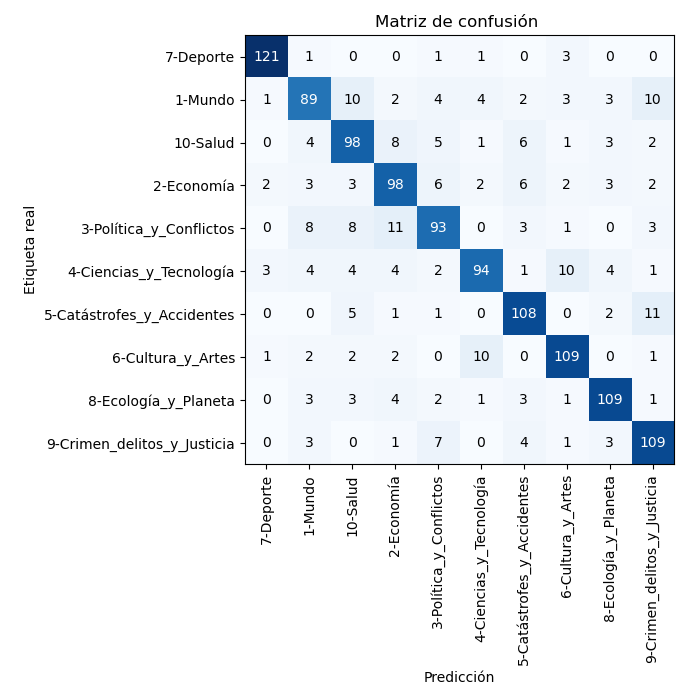

In [67]:
cm = confusion_matrix(y_true=y_true, y_pred=y_pred)
plot_confusion_matrix(cm, labels=lbs)

In [68]:
def predict_class(model, sentence, min_len = 4):

    tokenized = [tok.text for tok in spacy_es.tokenizer(sentence)]
    
    if len(tokenized) < min_len:
        tokenized += ['<pad>'] * (min_len - len(tokenized))
    device = 'cpu'
    indexed = [TEXT.vocab.stoi[t] for t in tokenized]
    
    tensor = torch.LongTensor(indexed).to(device)
    tensor = tensor.unsqueeze(0)
    preds = model(tensor)
    print(preds)
    max_preds = preds.argmax(dim = 1)
    return max_preds.item()

In [69]:
noticia = """Sin embargo, estos experimentos se llevaban a cabo en secreto, y cuando otras secciones de Guardian se dieron cuenta, el proyecto se canceló de inmediato."""
cat_map.get(predict_class(best_model, noticia))

tensor([[-0.3041, -0.2988,  0.1171, -0.3001,  0.0160,  0.2567, -0.2056, -0.1460,
         -0.0669, -0.0339]], grad_fn=<AddmmBackward0>)


'4-Ciencias_y_Tecnología'

In [70]:
cat_map.get(predict_class(best_model, "alexis y la copa america le pegoOoOooO"))

tensor([[ 2.5948, -0.6536, -0.4073, -0.5082, -0.5126,  0.1775, -2.0019,  0.6055,
         -1.2471, -0.7653]], grad_fn=<AddmmBackward0>)


'7-Deporte'

In [71]:
noticia = """Artistas mexicanos retoman los espacios públicos a través de la danza. Más de 120 artistas de 16 estados de México se reúnen para dar vida al Encuentro Nacional de Danza 2021. El evento cultural se lleva a cabo en distintos puntos de la capital del país, entre ellos el Complejo Cultural Los Pinos.
"""
cat_map.get(predict_class(best_model, noticia))

tensor([[-1.8592, -0.2127, -1.0981, -2.9064, -1.8833,  0.4033, -4.1155,  5.9889,
         -1.8329, -3.5471]], grad_fn=<AddmmBackward0>)


'6-Cultura_y_Artes'

# Comparar hiperparametros

gaurdar parametros utilizados y algunas metricas en tabla resumen

In [72]:
from operator import itemgetter
wanted_keys = ['test_loss', 'test_acc', 'best_valid_loss', 'LR', 'ds_name', 'MAX_LEN', 'DROPOUT', 
               'N_EPOCHS', 'best_epoch', 'dt', 'DEVICE_NAME', 'MAX_VOCAB_SIZE',
               'RANDOM_STATE', 'BATCH_SIZE', 'EMBEDDING_DIM', 'N_FILTERS', 'FILTER_SIZES',
               'OPTIMIZER', 'CRITERION',
              ]
wanted_values = list(itemgetter(*wanted_keys)(globals()))
hparams = dict(zip(wanted_keys, wanted_values))
saved = False
hparams

{'test_loss': 0.6184922500513494,
 'test_acc': 0.800240384042263,
 'best_valid_loss': 0.6431440360378474,
 'LR': 0.0005,
 'ds_name': 'ds_balanced_1133_rs2.csv',
 'MAX_LEN': 1200,
 'DROPOUT': 0.8,
 'N_EPOCHS': 10,
 'best_epoch': 12,
 'dt': '2021-12-06_17:02:24.972435',
 'DEVICE_NAME': 'cpu',
 'MAX_VOCAB_SIZE': 50000,
 'RANDOM_STATE': 8008,
 'BATCH_SIZE': 32,
 'EMBEDDING_DIM': 300,
 'N_FILTERS': 100,
 'FILTER_SIZES': [2, 3, 4],
 'OPTIMIZER': 'Adam',
 'CRITERION': 'CrossEntropyLoss'}

In [73]:
import pickle
try:
    with open ('./cnn_info', 'rb') as fp:
        attemps = pickle.load(fp)
    if not saved:
        attemps.append(hparams)
        saved = True
except FileNotFoundError:
    print('cnn_info not found...')
    attemps = [hparams]
finally:
    with open('./cnn_info', 'wb') as fp:
        pickle.dump(attemps, fp)

In [79]:
pd.DataFrame(attemps[-7:], columns=wanted_keys)

,test_loss,test_acc,best_valid_loss,LR,ds_name,MAX_LEN,DROPOUT,N_EPOCHS,best_epoch,dt,DEVICE_NAME,MAX_VOCAB_SIZE,RANDOM_STATE,BATCH_SIZE,EMBEDDING_DIM,N_FILTERS,FILTER_SIZES,OPTIMIZER,CRITERION
0,0.682565,0.784152,0.695947,0.0010,ds_balanced_795.csv,800,0.5,5,5,2021-12-06_14:29:18.133841,cpu,50000,8008,32,300,100,"[2, 3, 4]",Adam,CrossEntropyLoss
1,0.682565,0.784152,0.695947,0.0010,ds_balanced_795_rs2.csv,800,0.5,5,5,2021-12-06_15:15:03.999221,cpu,50000,8008,32,300,100,"[2, 3, 4]",Adam,CrossEntropyLoss
2,0.667618,0.781994,0.716108,0.0010,ds_balanced_795_rs8008.csv,800,0.5,5,5,2021-12-06_15:23:24.136707,cpu,50000,8008,32,300,100,"[2, 3, 4]",Adam,CrossEntropyLoss
3,0.631141,0.800841,0.667119,0.0010,ds_balanced_1133_rs2.csv,800,0.5,5,5,2021-12-06_15:33:23.438977,cpu,50000,8008,32,300,100,"[2, 3, 4]",Adam,CrossEntropyLoss
4,0.612477,0.801803,0.635521,0.0007,ds_balanced_1133_rs2.csv,1200,0.7,10,8,2021-12-06_16:25:18.619924,cpu,50000,8008,32,300,100,"[2, 3, 4]",Adam,CrossEntropyLoss
5,0.632431,0.807272,0.659115,0.0005,ds_balanced_1133_rs2.csv,1200,0.8,10,10,2021-12-06_16:55:23.360217,cpu,50000,8008,32,300,100,"[2, 3, 4]",Adam,CrossEntropyLoss
6,0.618492,0.800240,0.643144,0.0005,ds_balanced_1133_rs2.csv,1200,0.8,13,12,2021-12-06_17:02:24.972435,cpu,50000,8008,32,300,100,"[2, 3, 4]",Adam,CrossEntropyLoss
